<a href="https://colab.research.google.com/github/marybello/DecisionTreesClassifier/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries for preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Decision Trees for classification**
Decision Trees algorithm belongs to the supervised learning algorithms. it can be used for both regression and classification, yet is mostly used for classification problems.A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions.
For example,

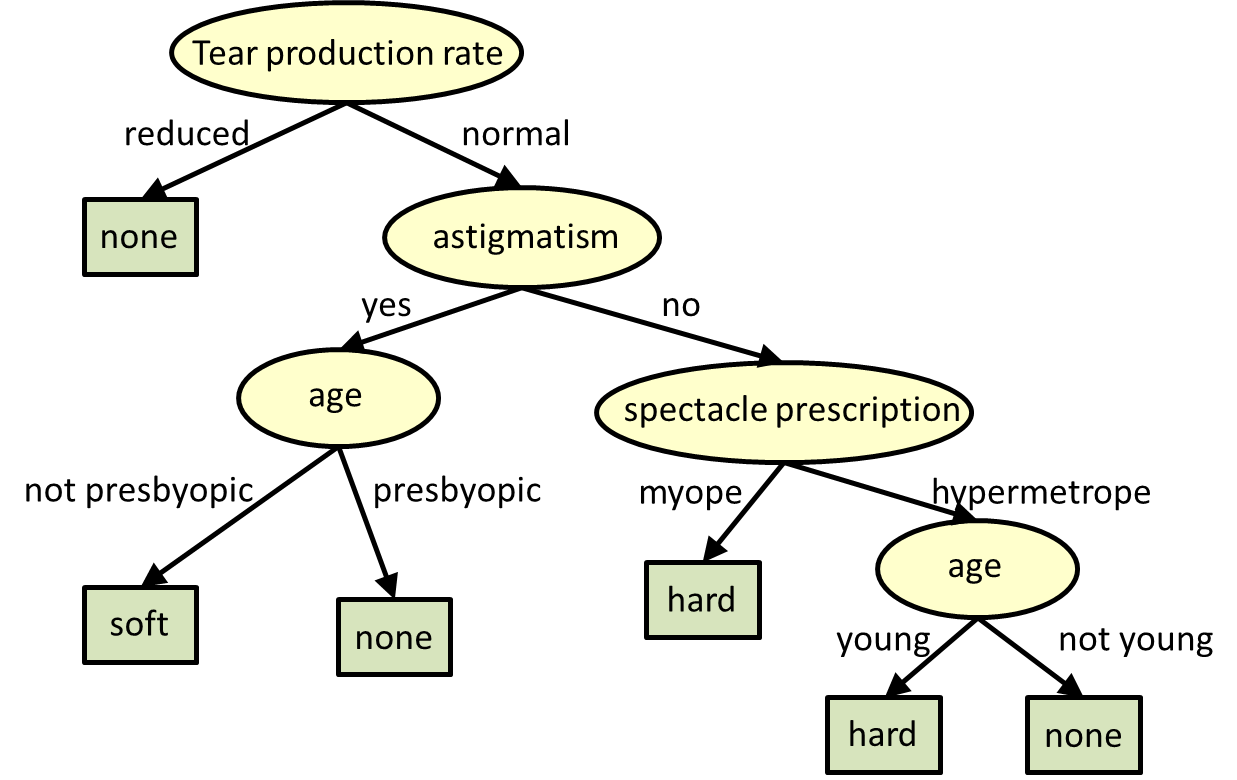

# **Important terminologies related to the decision Trees**

1. Root-node: This represents the entire population or sample and this further divides into 2 or more homogenous set
2. Splitting: this is the process of dividing a node into two or more subnodes
3. Decision Node: when a subnode splits into futher subnodes, it's called a decision node
4. Leaf/Terminal Node: Nodes that do not split
5. Pruning: The process of removing sub-nodes of a decision node, Opposite of splitting.
6. Branch/Sub-tree: A subsection of the entire tree is called branch or subtree
7. Parent/Child node: A node which is divided into subnodes is called a parent node whereas subnodes  are the child of a parent node




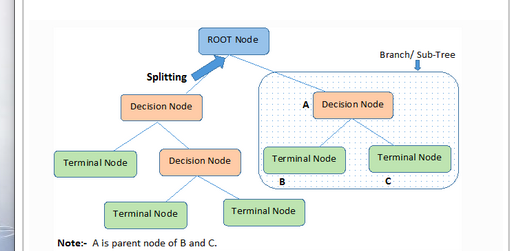

# **How does a decision tree works**
The root node feature is selected based on the results from the Attributes Selection Measure(ASM). ASM is a technique used in the data mining process for data reduction to make better analysis and prediction of the target variable. ASM is repeated until there's a leaf node that cannot be further splitted into subnodes. There are two major ASM techniques


1.   Gini Index
2.   Information Gain(ID3)



# **Gini Index**
This is the measure of the degree of probability of a variable being wrongly clasified when it's randomly chosen. When this is used as the ASM technique for the criterion to select the feature for the root node, the feature with the least gini index is selected

>$ Gini = 1 - \sum_{i=1}^{n}(Pi)^2$

# **Information Gain**
Entropy(the measure of randomness in the information being processed) is the main concept of this technique. By using this method, we can reduce the level of entropy from the root node to the leaf node 
>$ Entropy = E(s) = \sum_{i=1} - Pi log2Pi$

Now enough of the talking and let's get started



In [ ]:
#The dataset is from kaggle and contains a kidney disease data

In [48]:
df = pd.read_csv('DT_kidneydisease.csv', index_col=0)
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
2,2,62.0,80.000000,1.010,2.0,3.0,423.0,53.0,1.8,137.528754,4.627244,9.6,1,1,0,0,31,7500,0.0,0,4,1,1,0,1,0
3,3,48.0,70.000000,1.005,4.0,0.0,117.0,56.0,3.8,111.000000,2.500000,11.2,1,0,1,0,32,6700,3.9,1,3,1,1,1,1,0
4,4,51.0,80.000000,1.010,2.0,0.0,106.0,26.0,1.4,137.528754,4.627244,11.6,1,1,0,0,35,7300,4.6,0,3,1,0,0,0,0
7,7,24.0,76.469072,1.015,2.0,4.0,410.0,31.0,1.1,137.528754,4.627244,12.4,1,0,0,0,44,6900,5.0,0,4,1,0,1,0,0
8,8,52.0,100.000000,1.015,3.0,0.0,138.0,60.0,1.9,137.528754,4.627244,10.8,1,0,1,0,33,9600,4.0,1,4,1,0,0,1,0


In [35]:
#split into dependent and independent variable
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
y.head()

2    0
3    0
4    0
7    0
8    0
Name: classification, dtype: int64

In [36]:
#split into test and train
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size=0.2)

In [37]:
#import our decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

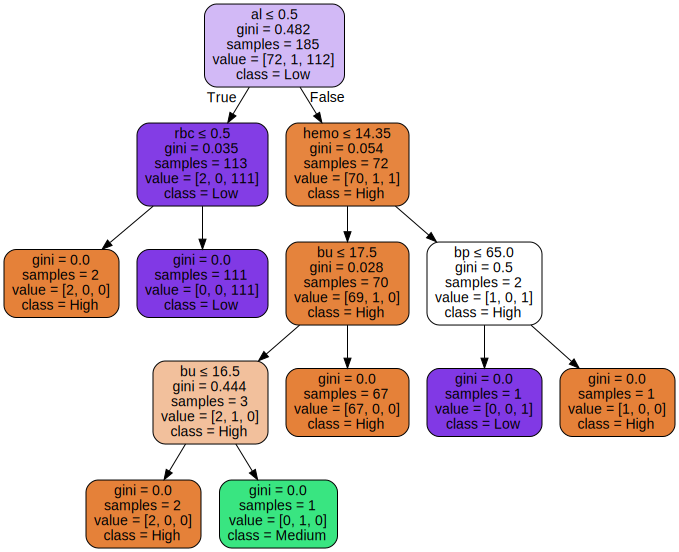

In [44]:
#let's visualize the tree
import graphviz
data = tree.export_graphviz(classifier,
                            out_file=None,
                            feature_names = X.columns,
                             filled=True,
                            rounded=True,
                            class_names= ['High', 'Medium','Low'],
                            special_characters=True)
graph = graphviz.Source(data)
graph.render('Gini')
graph

In [47]:
#validate the classifier, check the accuracy
classifier.score(x_test,y_test)

0.9787234042553191

!Yippie, we got an accuracy of 97.87%, pretty cool right!!

# **Assumptions to take note of while creating the decision tree**


1.   While Starting the training, the whole dataset is considered to be the root node
2.   The input values are preffered to be categorical
3. The attributes that is placed as the rootnode of the tree is based on statistical results



# **Are you getting a low accuracy? **
Here are some tips to optimize the performance of the algorithm


1.   Tune the max_depth parameter
2.   Swap between gini and entropy criterion and see which one gives you the best accuracy
3. Tune the splitter parameter: check 'best' or 'random'


# **Advantages and Disadvantages of Decision Tree**
Advantages


1.   It's easy to visualize
2.   Non-linear patterns in the data can be captured easily

Disadvantages


1.  Overfitting of the data is common
2.  A small variation in the input data can result in a different decision tree. This can be reduced by feature engineering
3. We have to balance the dataset before training the model



